In [1]:
# Install required library
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
housing = pd.read_csv('https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.csv')
housing.head() # Top 5 Rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


<h3>Columns Details</h3>

<ol>
  <li>
    <strong>longitude:</strong>
    <p>Represents the longitudinal coordinate of the center of a block group.</p>
    <p>A measure of how far east or west a location is on the Earth's surface.</p>
    <p>Negative values indicate locations west of the Prime Meridian.</p>
  </li>
  <li>
    <strong>latitude:</strong>
    <p>Represents the latitudinal coordinate of the center of a block group.</p>
    <p>A measure of how far north or south a location is on the Earth's surface.</p>
    <p>Higher values indicate locations farther north.</p>
  </li>
  <li>
    <strong>housing_median_age:</strong>
    <p>Median age of houses within a block group.</p>
    <p>A block group is the smallest geographical unit for which the U.S. Census Bureau publishes sample data (a group of roughly 600 to 3,000 people).</p>
    <p>Values are in years. A lower number means newer buildings.</p>
  </li>
  <li>
    <strong>total_rooms:</strong>
    <p>Total number of rooms within a block group.</p>
    <p>This includes all rooms in all housing units within the block group.</p>
  </li>
  <li>
    <strong>total_bedrooms:</strong>
    <p>Total number of bedrooms within a block group.</p>
    <p>Similar to total_rooms, this is a sum across all housing units.</p>
    <p>This column has some missing values in the dataset.</p>
  </li>
  <li>
    <strong>population:</strong>
    <p>Total number of people residing within a block group.</p>
  </li>
  <li>
    <strong>households:</strong>
    <p>Total number of households within a block group.</p>
    <p>A household is defined as a group of people residing within a home unit.</p>
  </li>
  <li>
    <strong>median_income:</strong>
    <p>Median income for households within a block group.</p>
    <p>Measured in tens of thousands of U.S. dollars. For example, a value of 6 represents $60,000.</p>
  </li>
  <li>
    <strong>median_house_value (Target Variable):</strong>
    <p>Median house value for households within a block group.</p>
    <p>Measured in U.S. dollars.</p>
    <p>This is the target variable for regression tasks using this dataset.</p>
  </li>
  <li>
    <strong>ocean_proximity:</strong>
    <p>Describes the proximity of the block group to the ocean.</p>
    <p>This is a categorical feature with values like:</p>
    <ul>
      <li>NEAR BAY</li>
      <li>&lt;1H OCEAN (less than 1 hour to ocean)</li>
      <li>INLAND</li>
      <li>NEAR OCEAN</li>
      <li>ISLAND</li>
    </ul>
  </li>
</ol>


In [4]:
#Shape of the data
print("Number of Rows in Data: ", housing.shape[0] )
print("Number of Columns in Data: ", housing.shape[1] )

Number of Rows in Data:  20640
Number of Columns in Data:  10


In [5]:
housing.isnull().sum()  # check null vaues

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [6]:
housing.duplicated().sum()  # Check duplicate row

0

In [7]:
# Quick description
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
#each category
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [9]:
#statistical description
housing.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


# Visualization

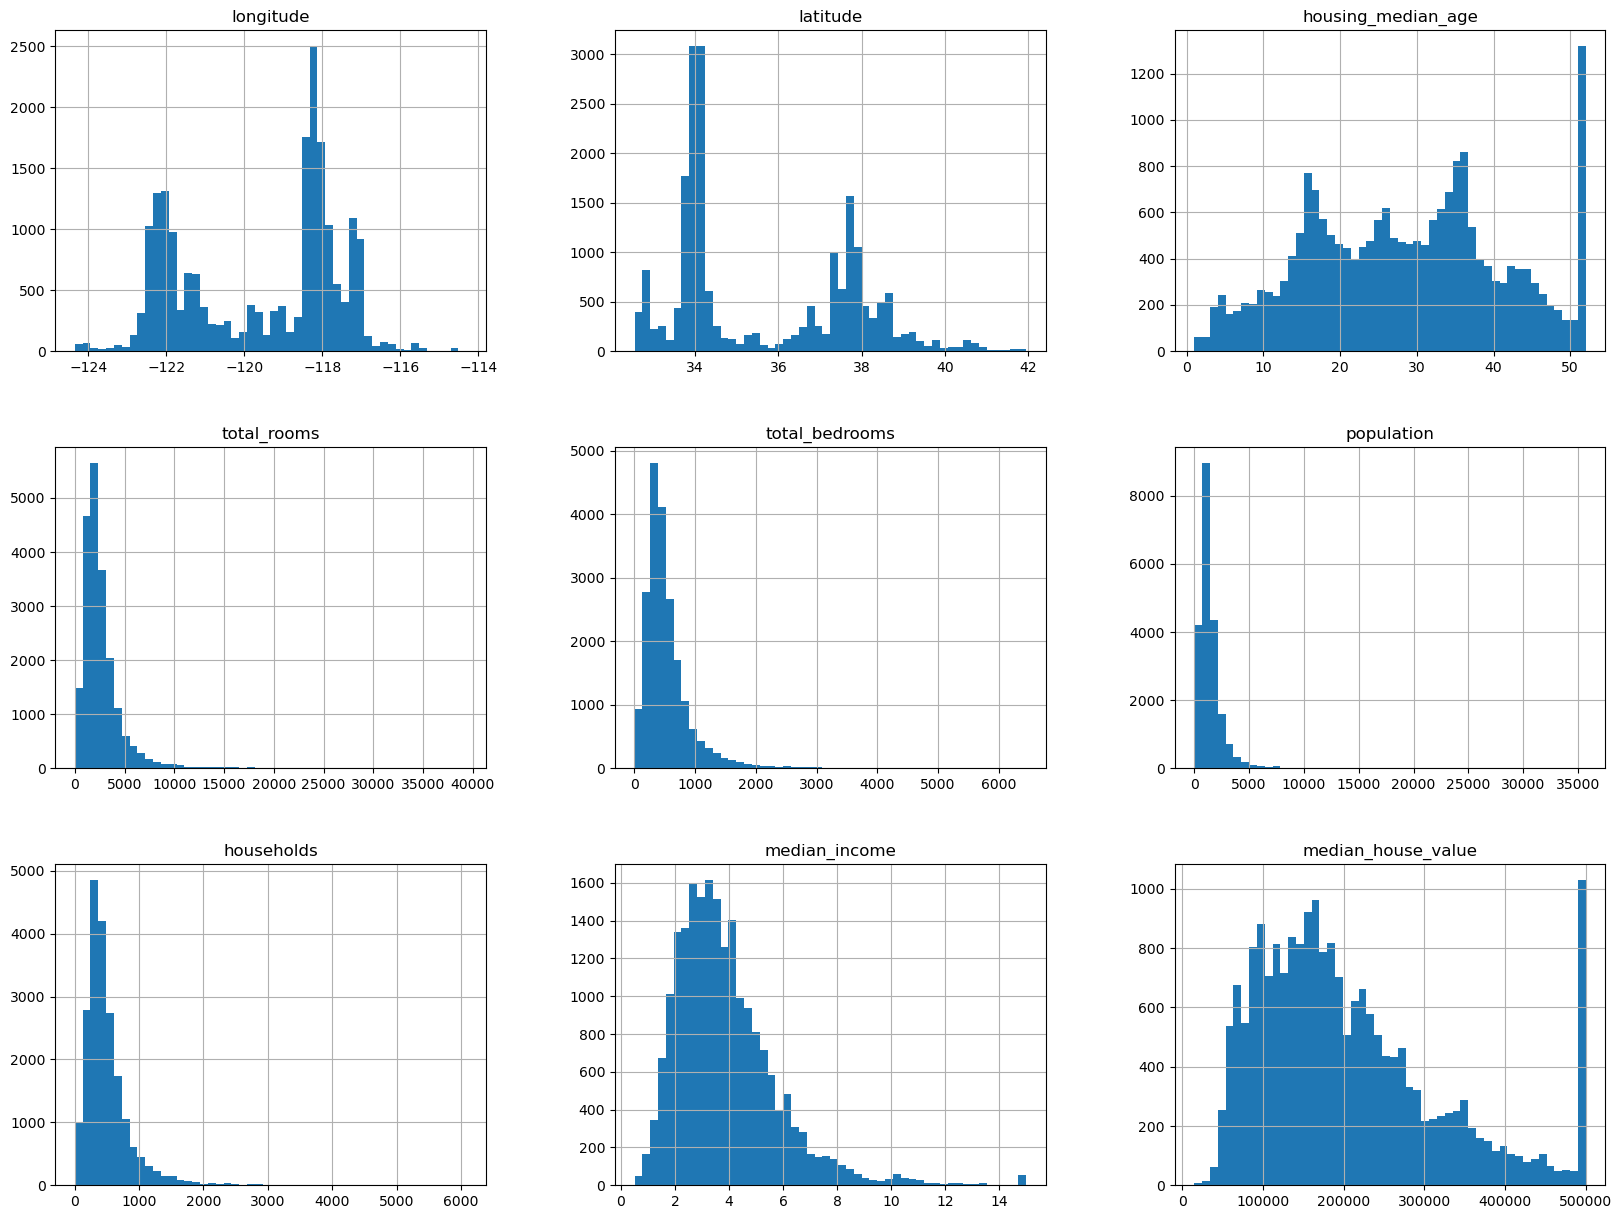

In [12]:
# Visualize distributions
housing.hist(bins=50, figsize=(20, 15))
plt.show()

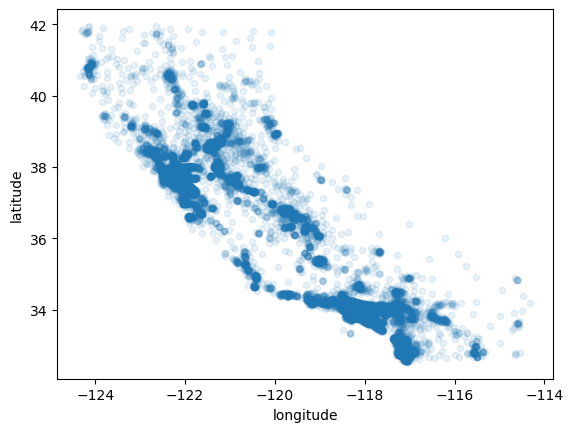

In [13]:
# Geographical scatter plot
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)
plt.show()

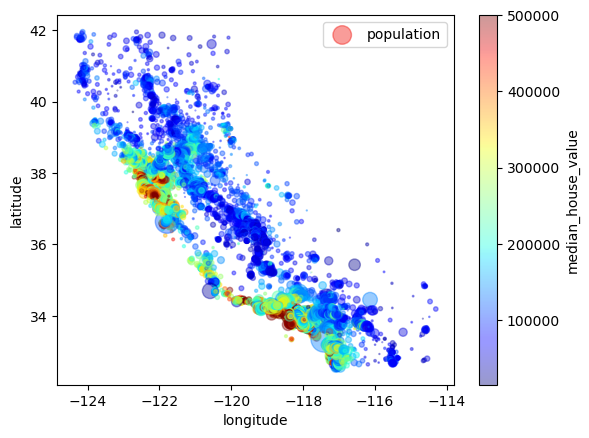

In [14]:
# Enhanced scatter plot with population size and prices
housing.plot(
    kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=housing["population"]/100, label="population",
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True
)
plt.show()

In [15]:
#corelation
housing.select_dtypes(exclude = "object").corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


<Axes: >

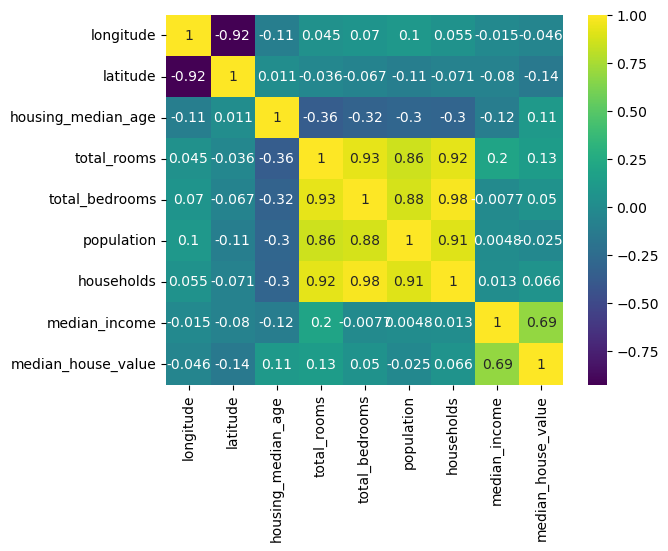

In [16]:
import seaborn as sns
sns.heatmap(housing.select_dtypes(exclude = "object").corr(),annot = True, cmap = 'viridis')

# Preparing DataSet

In [18]:
# X contains the independent variables (features)
X = housing.drop("median_house_value", axis=1)

# y contains the dependent variable (target)
y = housing['median_house_value']

In [19]:
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY


In [20]:
y.head()

0    452600.0
1    358500.0
2    352100.0
3    341300.0
4    342200.0
Name: median_house_value, dtype: float64

In [27]:
# Calculate the median and convert it to an integer
median_bedrooms = int(X["total_bedrooms"].median())

# Fill missing values with the integer median
X["total_bedrooms"].fillna(median_bedrooms, inplace=True)

C:\Users\miqba\AppData\Local\Temp\ipykernel_14920\2531638384.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X["total_bedrooms"].fillna(median_bedrooms, inplace=True)


In [29]:
X.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
dtype: int64

In [30]:
# Convert categorical variable "ocean_proximity" into dummy/indicator variables
dummies = pd.get_dummies(X["ocean_proximity"], drop_first=True, prefix="ocean_proximity")

In [31]:
dummies

,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,False,False,True,False
1,False,False,True,False
2,False,False,True,False
3,False,False,True,False
4,False,False,True,False
...,...,...,...,...
20635,True,False,False,False
20636,True,False,False,False
20637,True,False,False,False
20638,True,False,False,False


In [32]:
X = pd.concat([X, dummies], axis=1)

In [33]:
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND,True,False,False,False
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND,True,False,False,False
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND,True,False,False,False
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND,True,False,False,False


In [34]:
X = X.drop("ocean_proximity", axis=1)

In [36]:
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,False,False,True,False


In [38]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
from sklearn.preprocessing import StandardScaler

# Initialize scalers for both features (X) and target (y)
scaler_X = StandardScaler()
scaler_y = StandardScaler()

In [42]:
# Fit and transform the training data
X_train_scaled = scaler_X.fit_transform(X_train)
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)) # Reshape y for StandardScaler

In [43]:
# Transform the testing data using the fitted scaler
X_test_scaled = scaler_X.transform(X_test)
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)) # Reshape y for StandardScaler

In [44]:
X_test_scaled

array([[ 0.28534728,  0.1951    , -0.28632369, ..., -0.01556621,
        -0.35564565, -0.3802631 ],
       [ 0.06097472, -0.23549054,  0.11043502, ..., -0.01556621,
        -0.35564565, -0.3802631 ],
       [-1.42487026,  1.00947776,  1.85617335, ..., -0.01556621,
         2.81178749, -0.3802631 ],
       ...,
       [-1.23041404,  0.78014149, -0.28632369, ..., -0.01556621,
        -0.35564565, -0.3802631 ],
       [-0.08860699,  0.52740357,  0.58654547, ..., -0.01556621,
        -0.35564565, -0.3802631 ],
       [ 0.60445493, -0.66608108, -0.92113763, ..., -0.01556621,
        -0.35564565, -0.3802631 ]])

In [45]:
# Convert scaled data back to DataFrames (optional but often helpful)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [46]:
X_train_scaled

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,1.272587,-1.372811,0.348490,0.222569,0.211228,0.768276,0.322906,-0.326196,-0.680574,-0.015566,-0.355646,2.629758
1,0.709162,-0.876696,1.618118,0.340293,0.593094,-0.098901,0.672027,-0.035843,-0.680574,-0.015566,-0.355646,2.629758
2,-0.447603,-0.460146,-1.952710,-0.342597,-0.495226,-0.449818,-0.430461,0.144701,-0.680574,-0.015566,-0.355646,2.629758
3,1.232698,-1.382172,0.586545,-0.561490,-0.409306,-0.007434,-0.380587,-1.017864,-0.680574,-0.015566,-0.355646,2.629758
4,-0.108551,0.532084,1.142008,-0.119565,-0.256559,-0.485877,-0.314962,-0.171488,1.469348,-0.015566,-0.355646,-0.380263
...,...,...,...,...,...,...,...,...,...,...,...,...
16507,0.808883,-0.872016,0.507194,-0.603337,-0.805492,-0.675847,-0.742833,1.307215,-0.680574,-0.015566,-0.355646,-0.380263
16508,1.073144,-0.759688,0.348490,0.203255,0.075188,0.287195,-0.133839,-0.436266,1.469348,-0.015566,-0.355646,-0.380263
16509,0.599469,-0.755007,0.586545,-0.248786,0.072801,0.289833,0.070909,-0.496973,-0.680574,-0.015566,-0.355646,-0.380263
16510,-1.185540,0.906510,-1.079841,0.429046,0.139628,0.308303,0.154908,0.965450,-0.680574,-0.015566,-0.355646,-0.380263


# Train Model

In [67]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [69]:
# Initialize and train the models
linear_reg = LinearRegression()
linear_reg.fit(X_train_scaled, y_train_scaled)

LinearRegression()

In [71]:
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train_scaled, y_train_scaled)

DecisionTreeRegressor(random_state=42)

In [73]:
forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(X_train_scaled, y_train_scaled)

C:\Users\miqba\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(random_state=42)

In [75]:
# Make predictions using each model
linear_predictions = linear_reg.predict(X_test_scaled)
tree_predictions = tree_reg.predict(X_test_scaled)
forest_predictions = forest_reg.predict(X_test_scaled)

In [77]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Evaluate the models
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    print(f"{model_name} Performance:")
    print(f"  MSE: {mse:.4f}")
    print(f"  RMSE: {rmse:.4f}")
    print("-" * 20)
    return rmse

In [79]:
# Evaluate models on the test set
rmse_linear = evaluate_model(y_test_scaled, linear_predictions, "Linear Regression")
rmse_tree = evaluate_model(y_test_scaled, tree_predictions, "Decision Tree")
rmse_forest = evaluate_model(y_test_scaled, forest_predictions, "Random Forest")

Linear Regression Performance:
  MSE: 0.3672
  RMSE: 0.6060
--------------------
Decision Tree Performance:
  MSE: 0.3521
  RMSE: 0.5934
--------------------
Random Forest Performance:
  MSE: 0.1799
  RMSE: 0.4242
--------------------


# Cross-Validation

In [81]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
def cross_validate_model(model, X_train, y_train, model_name):
    scores = cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
    rmse_scores = np.sqrt(-scores)
    print(f"{model_name} Performance with Cross-Validation:")
    print(f"  Mean RMSE: {rmse_scores.mean():.4f}")
    print(f"  Standard Deviation: {rmse_scores.std():.4f}")
    print("-" * 20)
    return rmse_scores.mean()
    

In [83]:
cv_rmse_linear = cross_validate_model(linear_reg, X_train_scaled, y_train_scaled.ravel(), "Linear Regression")
cv_rmse_tree = cross_validate_model(tree_reg, X_train_scaled, y_train_scaled.ravel(), "Decision Tree")
cv_rmse_forest = cross_validate_model(forest_reg, X_train_scaled, y_train_scaled.ravel(), "Random Forest")

Linear Regression Performance with Cross-Validation:
  Mean RMSE: 0.5933
  Standard Deviation: 0.0216
--------------------
Decision Tree Performance with Cross-Validation:
  Mean RMSE: 0.5870
  Standard Deviation: 0.0181
--------------------
Random Forest Performance with Cross-Validation:
  Mean RMSE: 0.4226
  Standard Deviation: 0.0150
--------------------


# Fine-Tune Model with Grid Search and store Results

In [84]:
from sklearn.model_selection import GridSearchCV


# Perform GridSearchCV for Decision Tree and Random Forest
param_grids = {
    "Decision Tree": {
        "max_depth": [None, 5, 10, 50],
        "min_samples_split": [2, 5, 10],
    },
    "Random Forest": {
        "n_estimators": [10, 30, 50],
        "max_features": [2, 4, 6, "sqrt"],
    },
}

In [85]:
import joblib

best_models = {}
grid_search_results = {}
# Perform GridSearchCV for each model
for model_name, param_grid in param_grids.items():
    print(f"Performing GridSearchCV for {model_name}...")
    model = DecisionTreeRegressor(random_state=42) if model_name == "Decision Tree" else RandomForestRegressor(random_state=42)
    
    # Perform GridSearchCV
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring="neg_mean_squared_error", n_jobs=-1)
    grid_search.fit(X_train_scaled, y_train_scaled.ravel())
    
    # Store the best model and grid search object
    best_models[model_name] = grid_search.best_estimator_
    grid_search_results[model_name] = grid_search
    
    # Save grid search object for future use
    joblib.dump(grid_search, f"{model_name}_grid_search.pkl")
    
    print(f"Best Parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best CV RMSE for {model_name}: {np.sqrt(-grid_search.best_score_):.4f}")
    print("-" * 20)

Performing GridSearchCV for Decision Tree...
Best Parameters for Decision Tree: {'max_depth': 10, 'min_samples_split': 10}
Best CV RMSE for Decision Tree: 0.5405
--------------------
Performing GridSearchCV for Random Forest...
Best Parameters for Random Forest: {'max_features': 6, 'n_estimators': 50}
Best CV RMSE for Random Forest: 0.4269
--------------------


In [89]:
# Evaluate best models on the test set
for model_name, model in best_models.items():
    predictions = model.predict(X_test_scaled)
    evaluate_model(y_test_scaled, predictions, f"{model_name} (GridSearchCV)")

Decision Tree (GridSearchCV) Performance:
  MSE: 0.2790
  RMSE: 0.5282
--------------------
Random Forest (GridSearchCV) Performance:
  MSE: 0.1787
  RMSE: 0.4228
--------------------


# Create Comparison Table

In [91]:
# Collect results in a table
comparison_table = pd.DataFrame({
    "Model": ["Linear Regression", "Decision Tree", "Random Forest"],
    "Without CV RMSE": [rmse_linear, rmse_tree, rmse_forest],
    "With CV Mean RMSE": [cv_rmse_linear, cv_rmse_tree, cv_rmse_forest],
    "GridSearchCV Best RMSE": [None, np.sqrt(-grid_search.best_score_), np.sqrt(-grid_search.best_score_)]
})

comparison_table

,Model,Without CV RMSE,With CV Mean RMSE,GridSearchCV Best RMSE
0,Linear Regression,0.605960,0.593288,NaN
1,Decision Tree,0.593352,0.586981,0.426904
2,Random Forest,0.424152,0.422589,0.426904


# Load GridSearchCV Results

In [ ]:
# Load a saved GridSearchCV object
decision_tree_grid_search = joblib.load("Decision Tree_grid_search.pkl")
random_forest_grid_search = joblib.load("Random Forest_grid_search.pkl")

**********************************************************************************

<div style="text-align: center; font-size: 48px;"><strong>Thank You</strong></div>